In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [172]:
data = pd.read_csv('Perceptions towards eXplainable AI (XAI) (Responses) - Form Responses 1.csv')

In [173]:
columns_order = data.columns.tolist()

In [174]:
numeric_data =data.select_dtypes(include=["int64","float64"])
categorical_data = data.select_dtypes(include=["object"])

In [175]:
def check_skewness(data, threshold=0.5):

    skewed_features = []
    
    for column in data.select_dtypes(include=[np.number]).columns:
        skewness = data[column].skew()
        if abs(skewness) > threshold:
            skewed_features.append(column)
    
    return skewed_features

# Example usage:
skewed_features = check_skewness(numeric_data)
print("Skewed features:", skewed_features)


Skewed features: ['Age', 'Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Financial impact]', 'Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Medical impact]', 'Consider the following scenarios where AI systems make decisions. Rank the scenarios from the one needing explanations most to the least.(1 - most, 5 - least) [A surveillance system detecting suspicious person at public places.]', 'Consider the following scenarios where AI systems make decisions. Rank the scenarios from the one needing explanations most to the least.(1 - most, 5 - least) [A smartwatch

In [176]:
if numeric_data[skewed_features].isnull().any().any():
    numerical_imputer_skewed = SimpleImputer(strategy='median')
    numeric_data[skewed_features] = numerical_imputer_skewed.fit_transform(numeric_data[skewed_features])

In [177]:
# Handle missing values for numerical non_skewed features
non_skewed_features = list(set(numeric_data.columns) - set(skewed_features))
if numeric_data[non_skewed_features].isnull().any().any():
    numerical_imputer_non_skewed = SimpleImputer(strategy='mean')
    numeric_data[non_skewed_features] = numerical_imputer_non_skewed.fit_transform(numeric_data[non_skewed_features])

In [178]:
# Handle missing values for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_data[categorical_data.columns] = categorical_imputer.fit_transform(categorical_data)

In [179]:
data = pd.concat([numeric_data, categorical_data], axis=1)

In [180]:
data = data.reindex(columns=columns_order)

In [181]:
# Sample data: existing column names
existing_column_names = data.columns.tolist()

# Generate new column names using a for loop
new_column_names = [f'Question {i+1}' for i in range(len(existing_column_names))]

# Create a DataFrame to store the mapping
df_mapping = pd.DataFrame({
    'Existing Column Names': existing_column_names,
    'New Column Names': new_column_names
})

print (df_mapping)

                                Existing Column Names New Column Names
0                                           Timestamp       Question 1
1                                              Gender       Question 2
2                                                 Age       Question 3
3                                     Education level       Question 4
4                                 Field of occupation       Question 5
5                                    Occupation level       Question 6
6                                Country of Residence       Question 7
7   Which of the following mobile phone app uses A...       Question 8
8   Can an AI tool determine if you have risk of P...       Question 9
9   When you try to unlock your mobile phone using...      Question 10
10  Think about the advertisements you see when yo...      Question 11
11  Assume that an AI system makes decisions for y...      Question 12
12  Assume that an AI system makes decisions for y...      Question 13
13  A 

In [182]:
data.columns = new_column_names

In [183]:
data.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,...,Question 22,Question 23,Question 24,Question 25,Question 26,Question 27,Question 28,Question 29,Question 30,Question 31
0,3/21/2022 19:53:12,Female,31,Completed Undergraduate Degree,Architecture and Engineering,Entry level,Singapore,Email,Yes,No,...,1,An explanation for every decision made by the ...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,What happens when a person doesn't agree with ...
1,3/21/2022 20:12:56,Female,24,Completed Undergraduate Degree,Unoccupied,Unoccupied,Singapore,Email,Yes,No,...,2,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,No
2,3/21/2022 20:18:00,Female,31,Completed Undergraduate Degree,Computer and Mathematical,Student,Singapore,Email,Yes,Yes,...,1,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,3,1,5,4,Easy to understand - Expect no technical exper...,No
3,3/21/2022 20:18:37,Female,26,Completed Undergraduate Degree,Computer and Mathematical,Unoccupied,Singapore,Email,Yes,Yes,...,1,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,3,1,2,4,5,Easy to understand - Expect no technical exper...,No
4,3/21/2022 20:33:45,Male,32,Completed Undergraduate Degree,Other,Executive level,Singapore,Email,Yes,No,...,3,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,4,2,1,3,5,Easy to understand - Expect no technical exper...,No


In [184]:
unique_values_list = []

for column in data.columns:
    # Convert all unique values to strings
    unique_values = ', '.join(str(val) for val in data[column].unique())
    unique_values_list.append({'Column Name': column, 'Unique Values': unique_values})

# Convert the list of dictionaries into a DataFrame
unique_values_df = pd.DataFrame(unique_values_list)

print(unique_values_df)

    Column Name                                      Unique Values
0    Question 1  3/21/2022 19:53:12, 3/21/2022 20:12:56, 3/21/2...
1    Question 2                    Female, Male, Prefer not to say
2    Question 3  31, 24, 26, 32, 29, 28, 30, 27, 34, 33, 35, 23...
3    Question 4  Completed Undergraduate Degree, Completed Post...
4    Question 5  Architecture and Engineering, Unoccupied, Comp...
5    Question 6  Entry level, Unoccupied, Student, Executive le...
6    Question 7  Singapore, Sri Lanka, Canada, United Kingdom, ...
7    Question 8  Email, None of the above, All of the above, Ca...
8    Question 9                             Yes, No, I do not know
9   Question 10                             No, Yes, I do not know
10  Question 11                             Yes, No, I do not know
11  Question 12  Very important, Important, Neutral, Not import...
12  Question 13  I need an explanation for both decisions, I ne...
13  Question 14                                           (b),

In [185]:
data_types=['Ordinal' , 'Nominal' , 'Descrete','Ordinal','Nominal', 'Ordinal','Nominal','Nominal','Nominal','Nominal','Nominal','Ordinal','Nominal','Nominal','Nominal','Nominal','Nominal','Descrete','Descrete','Descrete','Descrete','Descrete','Nominal','Nominal','Descrete','Descrete','Descrete','Descrete','Descrete','Nominal','Nominal']

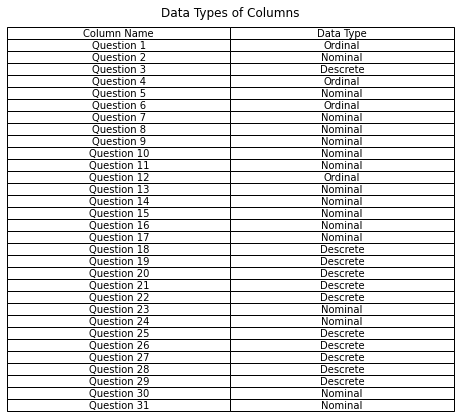

In [186]:
table_data = pd.DataFrame({
    'Column Name': data.columns,
    'Data Type': data_types
})

# Create the table plot
plt.figure(figsize=(8, 4))
plt.table(cellText=table_data.values,
          colLabels=table_data.columns,
          cellLoc='center',
          loc='upper center')
plt.title('Data Types of Columns')
plt.axis('off')  
plt.savefig('data_types_table.png')
plt.show()

## Descriptive Analysis - Numeric

#### Categorical - Nominal

In [187]:
desired_data_types = ['Nominal']
filtered_columns = table_data[table_data['Data Type'].isin(desired_data_types)]

In [188]:
from tabulate import tabulate
freq_list = []
normalized_freq_list = []
mode_list = []

# Calculate frequency, normalized frequency, and mode for each column
for column in filtered_columns['Column Name']:
    # Calculate frequency
    freq = data[column].value_counts().to_dict()
    freq_list.append(freq)
    
    # Calculate normalized frequency
    total_count = sum(freq.values())
    normalized_freq = {key: value / total_count for key, value in freq.items()}
    normalized_freq_list.append(normalized_freq)
    
    # Calculate mode
    mode = data[column].mode().iloc[0]
    mode_list.append(mode)

# Create a DataFrame to store the results
results_table = pd.DataFrame({
    'Column Name': filtered_columns['Column Name'],
    #'Frequency': freq_list,
    #'Normalized Frequency': normalized_freq_list,
    'Mode': mode_list
})

# Print the results table using tabulate
print(tabulate(results_table, headers='keys', tablefmt='pretty'))


+----+-------------+------------------------------------------------------------+
|    | Column Name |                            Mode                            |
+----+-------------+------------------------------------------------------------+
| 1  | Question 2  |                            Male                            |
| 4  | Question 5  |                 Computer and Mathematical                  |
| 6  | Question 7  |                         Sri Lanka                          |
| 7  | Question 8  |                           Email                            |
| 8  | Question 9  |                            Yes                             |
| 9  | Question 10 |                             No                             |
| 10 | Question 11 |                            Yes                             |
| 12 | Question 13 |          I need an explanation for both decisions          |
| 13 | Question 14 |                            (b)                             |
| 14 | Question 

#### Categorical - Ordinal

In [189]:
desired_data_types = ['Ordinal']
filtered_columns = table_data[table_data['Data Type'].isin(desired_data_types)]

In [190]:
freq_list = []
normalized_freq_list = []
mode_list = []
cumulative_freq_list = []
normalized_cumulative_freq_list = []

for column in filtered_columns['Column Name']:
    # Calculate frequency
    freq = data[column].value_counts().to_dict()
    freq_list.append(freq)
    
    # Calculate normalized frequency
    total_count = sum(freq.values())
    normalized_freq = {key: value / total_count for key, value in freq.items()}
    normalized_freq_list.append(normalized_freq)
    
    # Calculate mode
    mode = data[column].mode().iloc[0]
    mode_list.append(mode)
    
    # Calculate cumulative frequency
    cum_freq = data[column].value_counts().sort_index().cumsum().to_dict()
    cumulative_freq_list.append(cum_freq)
    
    # Calculate normalized cumulative frequency
    total_cumulative_count = sum(cum_freq.values())
    normalized_cum_freq = {key: value / total_cumulative_count for key, value in cum_freq.items()}
    normalized_cumulative_freq_list.append(normalized_cum_freq)

# Create a DataFrame to store the results
results_table = pd.DataFrame({
    'Column Name': filtered_columns['Column Name'],
    'Frequency': freq_list,
    'Normalized Frequency': normalized_freq_list,
    'Mode': mode_list,
    'Cumulative Frequency': cumulative_freq_list,
    'Normalized Cumulative Frequency': normalized_cumulative_freq_list,
})

# Print the results table using tabulate
print(tabulate(results_table, headers='keys', tablefmt='pretty'))

+----+-------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [191]:
#cumulative frequency for the question 4 column with the respective percentage as a table
question_4 = data['Question 4']
cumulative_freq = question_4.value_counts().sort_index().cumsum()
cumulative_percentage = (cumulative_freq / cumulative_freq.max()) *100

cumulative_table = pd.DataFrame({
    'Value': cumulative_freq.index,
    'Cumulative Frequency': cumulative_freq.values,
    'Cumulative Percentage': cumulative_percentage.values
})

print(tabulate(cumulative_table, headers='keys', tablefmt='pretty'))



+---+-----------------------------------------------------------------------+----------------------+-----------------------+
|   |                                 Value                                 | Cumulative Frequency | Cumulative Percentage |
+---+-----------------------------------------------------------------------+----------------------+-----------------------+
| 0 |                         Completed High School                         |          49          |  14.984709480122325   |
| 1 |                    Completed Post Graduate Degree                     |         183          |   55.96330275229357   |
| 2 |                       Completed Primary School                        |         184          |  56.269113149847094   |
| 3 |                    Completed Undergraduate Degree                     |         323          |   98.77675840978594   |
| 4 |                                Masters                                |         326          |   99.69418960244649   |


## Descriptive Analysis - Visual

In [192]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

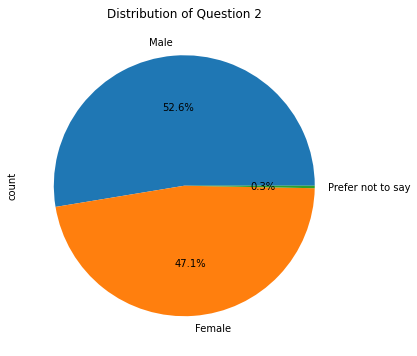

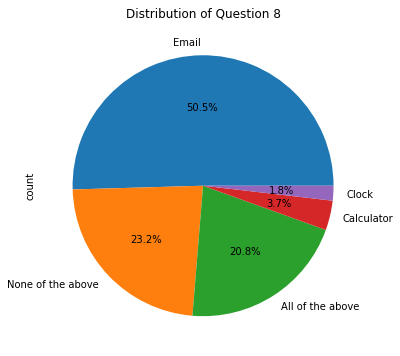

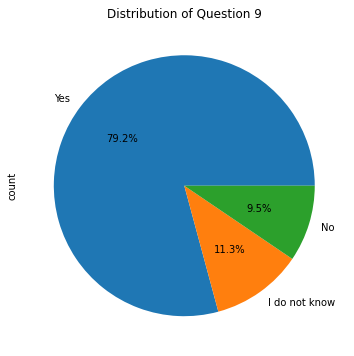

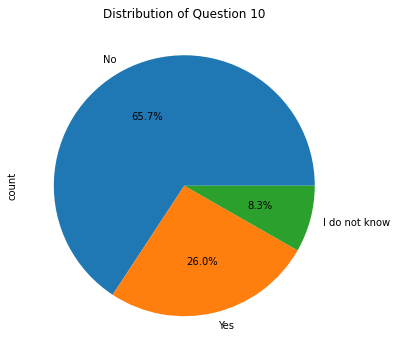

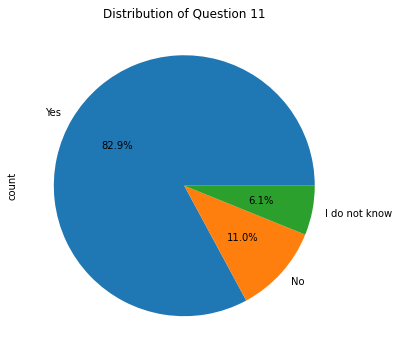

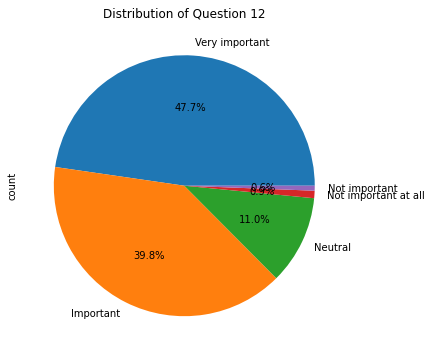

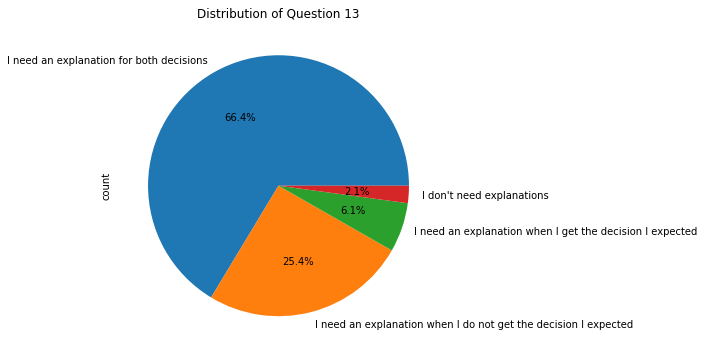

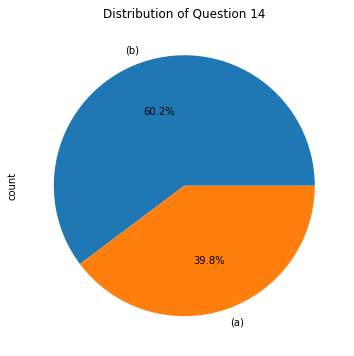

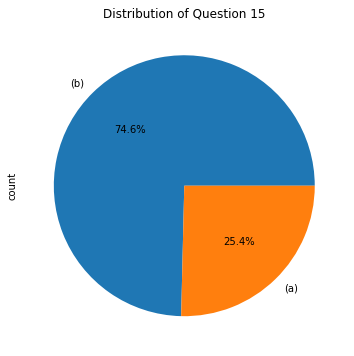

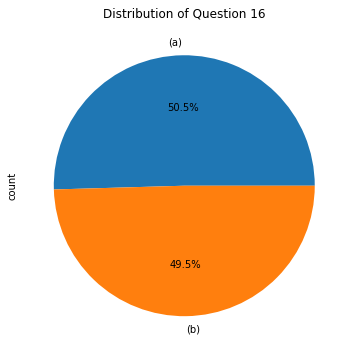

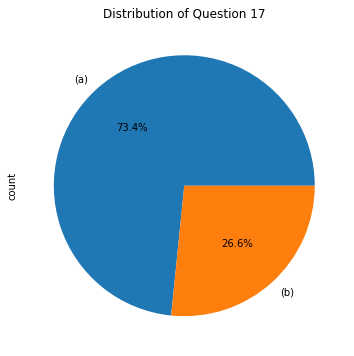

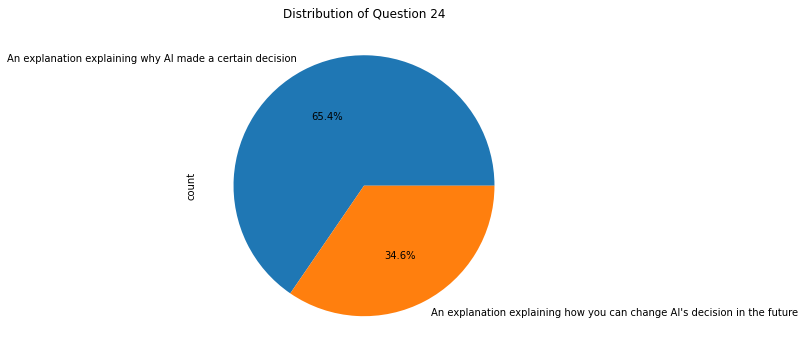

In [193]:

for column in categorical_columns:
    if len(data[column].unique()) < 6:
        plt.figure(figsize=(6, 6))
        data[column].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f'Distribution of {column}')
        # plt.savefig(f'{column}_pie_chart.png')
        plt.show()


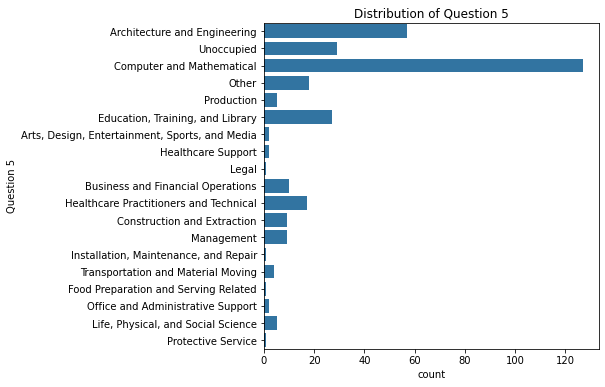

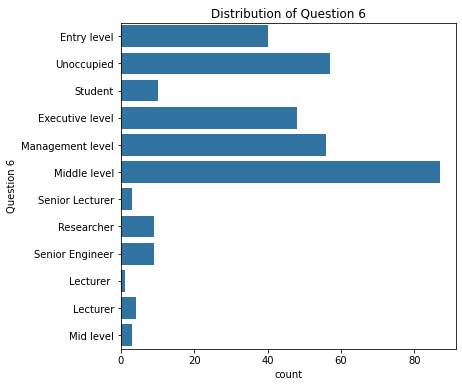

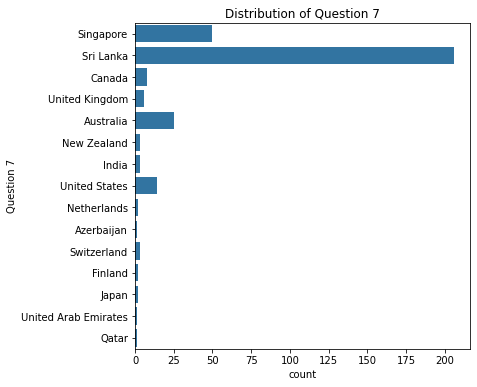

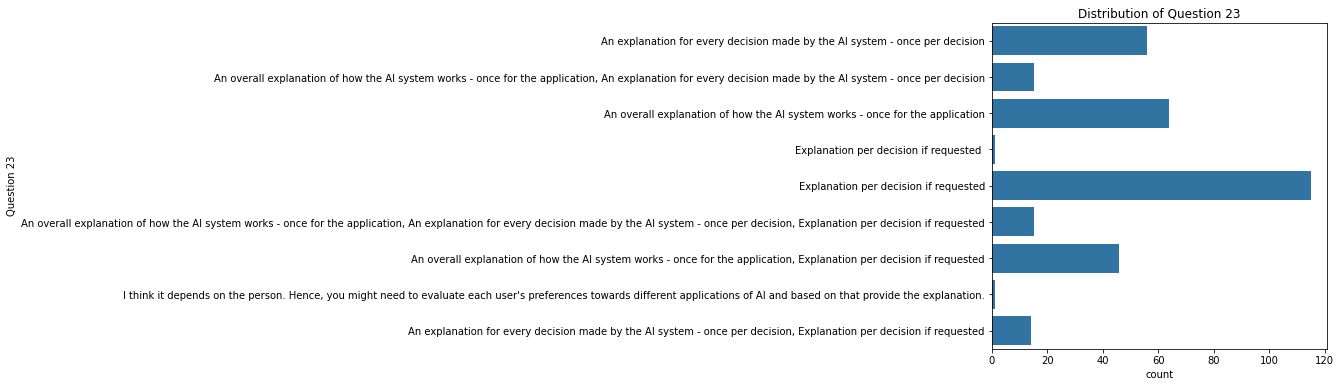

In [194]:

for column in categorical_columns:
    if 20> len(data[column].unique()) >6 :
        plt.figure(figsize=(6, 6))
        sns.countplot(data[column])
        plt.title(f'Distribution of {column}')
        # plt.savefig(f'{column}_countplot.png')
        plt.show()

In [195]:
def plot_outliers(data):

    num_cols = 3  
    num_features = len(data.columns)
    num_rows = (num_features - 1) // num_cols + 1
    plt.figure(figsize=(4 * num_cols, 4 * num_rows))
    for i, column in enumerate(data.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(y=data[column], color='skyblue', orient='v')
        plt.title(column)

    plt.tight_layout()
    plt.show()    

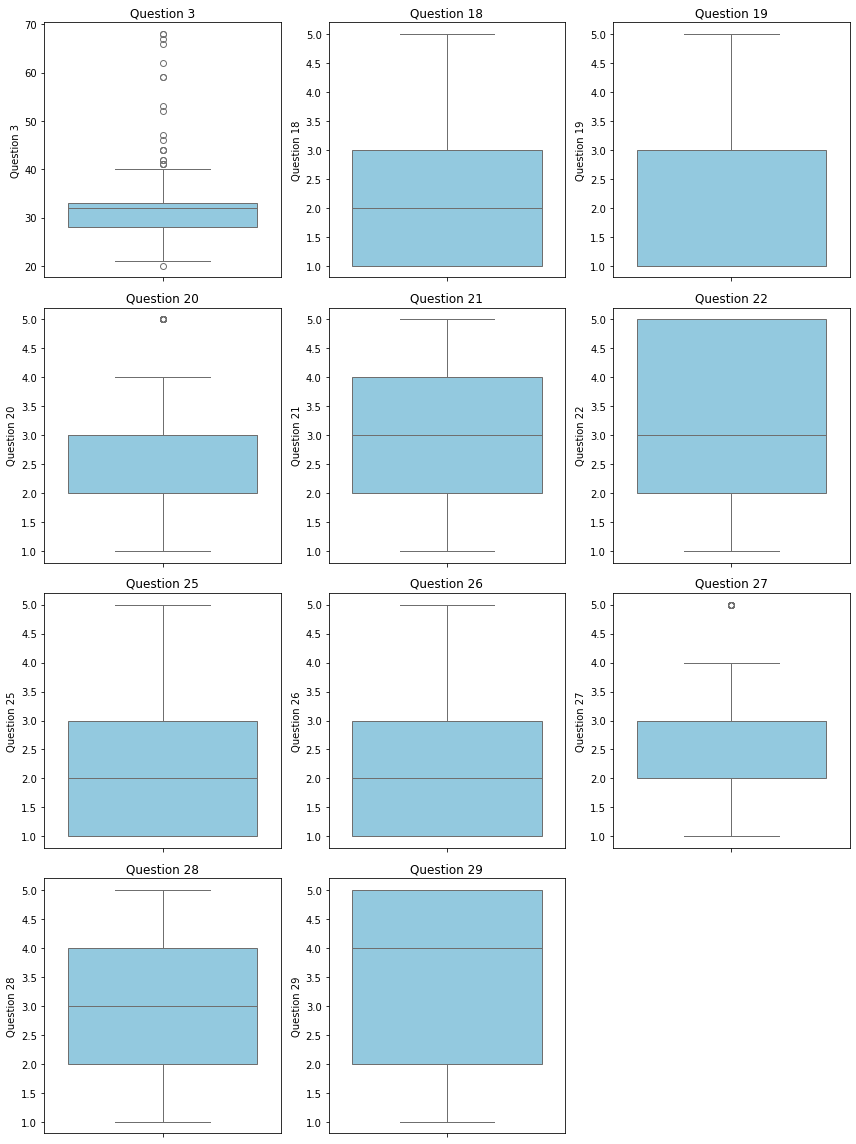

In [196]:
numerical_columns= data.select_dtypes(include=['int64', 'float64'])
plot_outliers(numerical_columns)


In [197]:
def plot_histograms(data):

    num_cols = 3  
    num_features = len(data.columns)
    num_rows = (num_features - 1) // num_cols + 1
    plt.figure(figsize=(4 * num_cols, 4 * num_rows))
    for i, column in enumerate(data.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(data[column], color='skyblue', kde=True)
        plt.title(column)

    plt.tight_layout()
    plt.show()

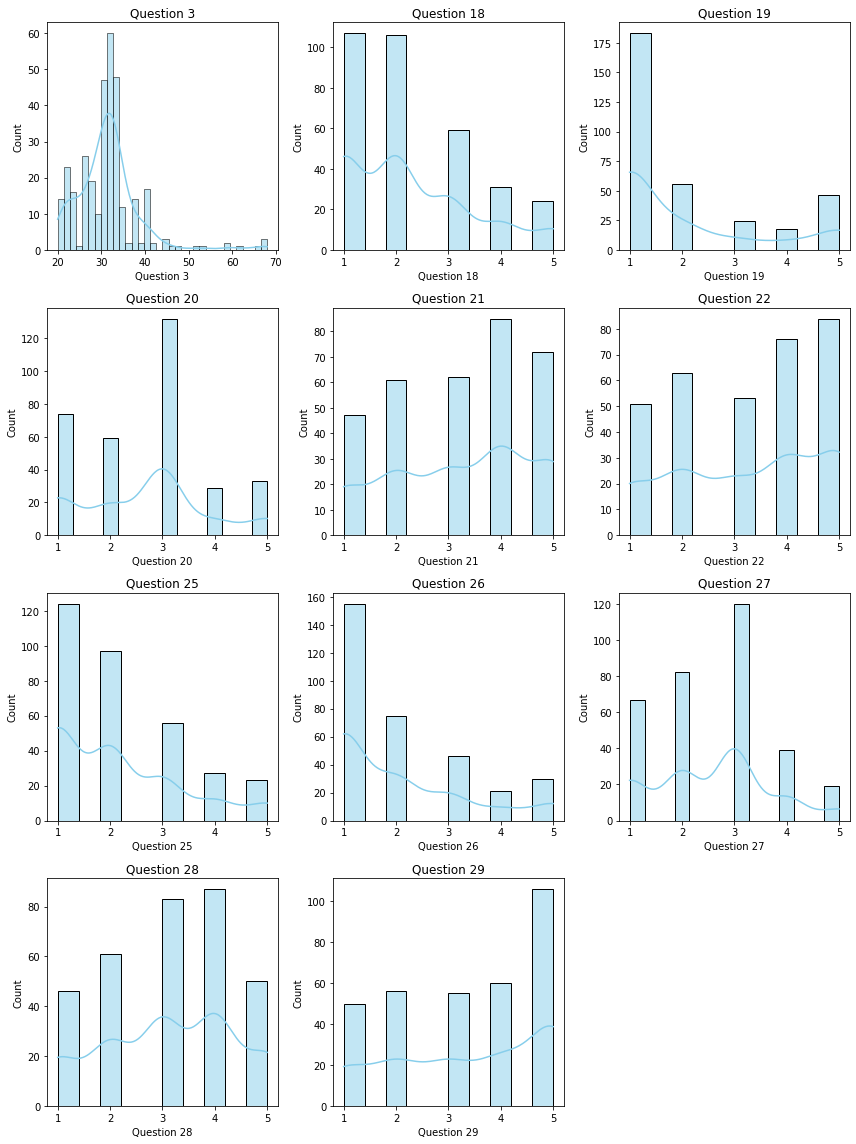

In [198]:
plot_histograms(numerical_columns)

In [199]:
def plot_scatter(data):

    num_cols = 3  
    num_features = len(data.columns)
    num_rows = (num_features - 1) // num_cols + 1
    plt.figure(figsize=(4 * num_cols, 4 * num_rows))
    for i, column in enumerate(data.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.scatterplot(x=data[column], y=data[column], color='skyblue')
        plt.title(column)

    plt.tight_layout()
    plt.show()

giving marks

In [200]:
data['Question 8'] = data['Question 8'].map({'Email': 1, 'Calculator': 0 , 'Clock':0, 'All of the above':0 , 'None of the above':0})
data['Question 9'] = data['Question 9'].map({'Yes': 1, 'No': 0 ,'I do not know':0})
data['Question 10'] = data['Question 10'].map({'No': 1, 'Yes': 0 ,'I do not know':0})
data['Question 11'] = data['Question 11'].map({'Yes': 1, 'No': 0 ,'I do not know':0})

In [201]:
# Create new column with the sum of specified columns
data['Score of the section 2'] = data['Question 8'] + data['Question 9'] + data['Question 10'] + data['Question 11']


In [202]:
data['Score of the section 2'].unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [203]:
data.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,...,Question 23,Question 24,Question 25,Question 26,Question 27,Question 28,Question 29,Question 30,Question 31,Score of the section 2
0,3/21/2022 19:53:12,Female,31,Completed Undergraduate Degree,Architecture and Engineering,Entry level,Singapore,1,1,1,...,An explanation for every decision made by the ...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,What happens when a person doesn't agree with ...,4
1,3/21/2022 20:12:56,Female,24,Completed Undergraduate Degree,Unoccupied,Unoccupied,Singapore,1,1,1,...,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,1,3,4,5,Easy to understand - Expect no technical exper...,No,4
2,3/21/2022 20:18:00,Female,31,Completed Undergraduate Degree,Computer and Mathematical,Student,Singapore,1,1,0,...,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,2,3,1,5,4,Easy to understand - Expect no technical exper...,No,3
3,3/21/2022 20:18:37,Female,26,Completed Undergraduate Degree,Computer and Mathematical,Unoccupied,Singapore,1,1,0,...,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,3,1,2,4,5,Easy to understand - Expect no technical exper...,No,3
4,3/21/2022 20:33:45,Male,32,Completed Undergraduate Degree,Other,Executive level,Singapore,1,1,1,...,An overall explanation of how the AI system wo...,An explanation explaining why AI made a certai...,4,2,1,3,5,Easy to understand - Expect no technical exper...,No,4


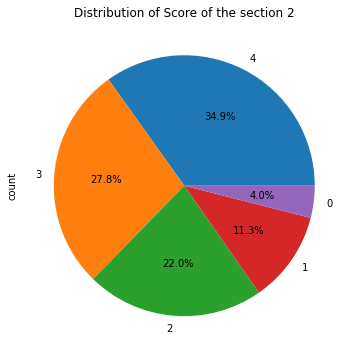

In [204]:
plt.figure(figsize=(6, 6))
data['Score of the section 2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f'Distribution of Score of the section 2')
# plt.savefig(f'{column}_pie_chart.png')
plt.show()

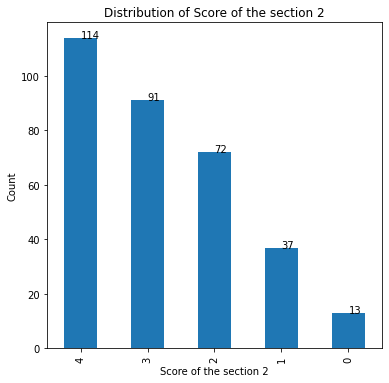

In [205]:
plt.figure(figsize=(6, 6))
counts = data['Score of the section 2'].value_counts()
counts.plot.bar()
plt.title('Distribution of Score of the section 2')
plt.ylabel('Count')

for index, value in enumerate(counts):
    plt.text(index, value, str(value))

# plt.savefig('Score_of_the_section_2_bar_chart.png')
plt.show()

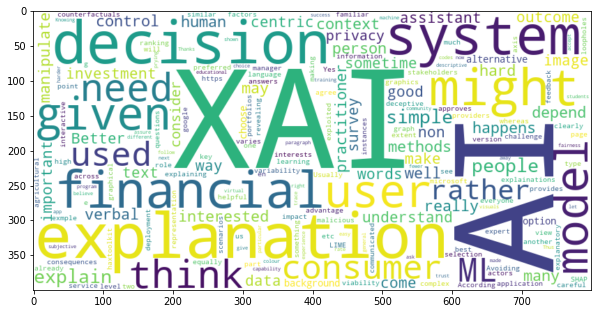

In [206]:
##T cloud for question 31 column
from wordcloud import WordCloud

text = ' '.join(data['Question 31'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')

In [207]:
from wordcloud import WordCloud
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have already defined the 'data' and 'text' variables as shown in your code

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Join the filtered tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Calculate word frequencies
word_freq = pd.Series(filtered_tokens).value_counts()

# Calculate percentages
word_percentage = (word_freq / word_freq.sum()) * 100

# Create DataFrame
word_table = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values, 'Percentage': word_percentage.values})

# Display the table
print(word_table)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YASIRU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YASIRU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


             Word  Frequency  Percentage
0              ai          9    2.686567
1             xai          9    2.686567
2           would          6    1.791045
3     explanation          6    1.791045
4        decision          5    1.492537
..            ...        ...         ...
225  practitioner          1    0.298507
226          role          1    0.298507
227         needs          1    0.298507
228        expert          1    0.298507
229          none          1    0.298507

[230 rows x 3 columns]


In [208]:
# Display the first 30 rows of the table
print(word_table.head(50))

           Word  Frequency  Percentage
0            ai          9    2.686567
1           xai          9    2.686567
2         would          6    1.791045
3   explanation          6    1.791045
4      decision          5    1.492537
5         might          5    1.492537
6          user          4    1.194030
7     financial          4    1.194030
8         think          4    1.194030
9         given          4    1.194030
10       rather          3    0.895522
11       people          3    0.895522
12        could          3    0.895522
13         need          3    0.895522
14       system          3    0.895522
15      systems          3    0.895522
16      explain          3    0.895522
17           ml          3    0.895522
18         used          3    0.895522
19       simple          3    0.895522
20        model          3    0.895522
21       really          2    0.597015
22         hard          2    0.597015
23      however          2    0.597015
24         well          

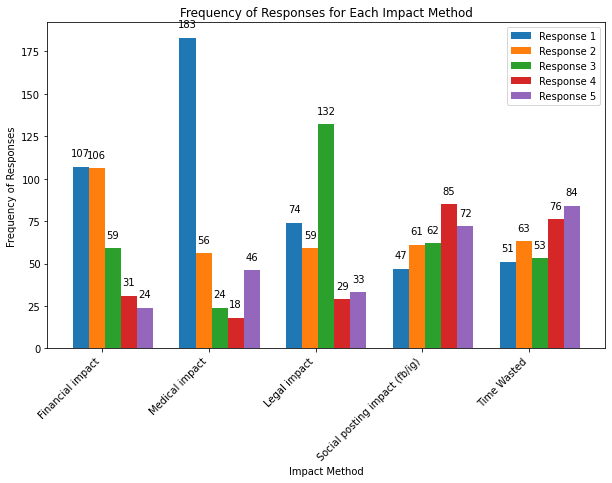

In [214]:
import numpy as np

# Define the response values
response_values = [1, 2, 3, 4, 5]

# Initialize an empty list to store the frequency of each response value for each impact method
frequency_by_response = []

# Loop through each response value
for value in response_values:
    # Get the frequency of the response value for each impact method
    frequency = [data[column].value_counts().get(value, 0) for column in ['Question 18', 'Question 19', 'Question 20', 'Question 21', 'Question 22']]
    # Append the frequency list to the overall list
    frequency_by_response.append(frequency)

# Convert the list to a numpy array for easier manipulation
frequency_by_response = np.array(frequency_by_response)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each response value as a clustered bar
width = 0.15
for i, value in enumerate(response_values):
    plt.bar(np.arange(len(impact_methods)) + i*width, frequency_by_response[i], width, label=f'Response {value}')
    # Add text labels for the frequency values on top of each bar
    for j, freq in enumerate(frequency_by_response[i]):
        plt.text(j + i*width, freq + 5, str(freq), ha='center', va='bottom')

plt.xlabel('Impact Method')
plt.ylabel('Frequency of Responses')
plt.title('Frequency of Responses for Each Impact Method')
plt.xticks(np.arange(len(impact_methods)) + 0.2, impact_methods, rotation=45, ha='right')
plt.legend()
plt.show()


